In [8]:
import numpy as np
import rasterio as rio
from rasterio.transform import from_origin

print("Starting")

# paramters
input_data_file = data_file = '/Users/tz20896/Documents/PhD/AR_sandbox/laharz_data/sandbox_topo.npy'
output_file = '/Users/tz20896/Documents/PhD/AR_SANDBOX/laharz_data/test1/sandbox_elev.tif'
CRS = "EPSG:4326"
top_left_x_coord = -2.6022 # degrees for geographic, metres for projected (eg UTM)
top_left_y_coord = 51.4585
x_resolution = .0003 # degrees for geographic, metres for projected (eg UTM)
y_resolution =.0003

BUFFER = 15 # pixels from outside border to set to zero

V_scale = 7e3 # scale factor from sand height in mm to topography height in m. NOTE: resulting topography map will have units of m instead of mm. 
offset = 200 # offset in meters to prevent possible negative heights.

# load data
sandbox_data = np.load(input_data_file)

# apply buffer
sandbox_zeros = np.zeros_like(sandbox_data)

sandbox_zeros[BUFFER:-BUFFER,BUFFER:-BUFFER] = sandbox_data[BUFFER:-BUFFER,BUFFER:-BUFFER]

sandbox_data = sandbox_zeros

# apply scaling 1e3 is to convert mm to m
sandbox_data = sandbox_data*V_scale/1e3 + offset

# Define the geospatial information
transform = from_origin(top_left_x_coord, top_left_y_coord, x_resolution, y_resolution)

# Specify the profile
profile = {
    "driver": "GTiff",
    "height": sandbox_data.shape[0],
    "width": sandbox_data.shape[1],
    "count": 1,  # number of bands
    "dtype": sandbox_data.dtype,
    "crs": CRS,  
    "transform": transform
}
# Write the NumPy array to a GeoTIFF file
with rio.open(output_file, 'w', **profile) as dst:
    dst.write(sandbox_data, 1)

print("File created successfully!")

Starting
File created successfully!


Maximum Elevation: 2097.216489192774 meters
Coordinates: (-2.5509, 51.4198)


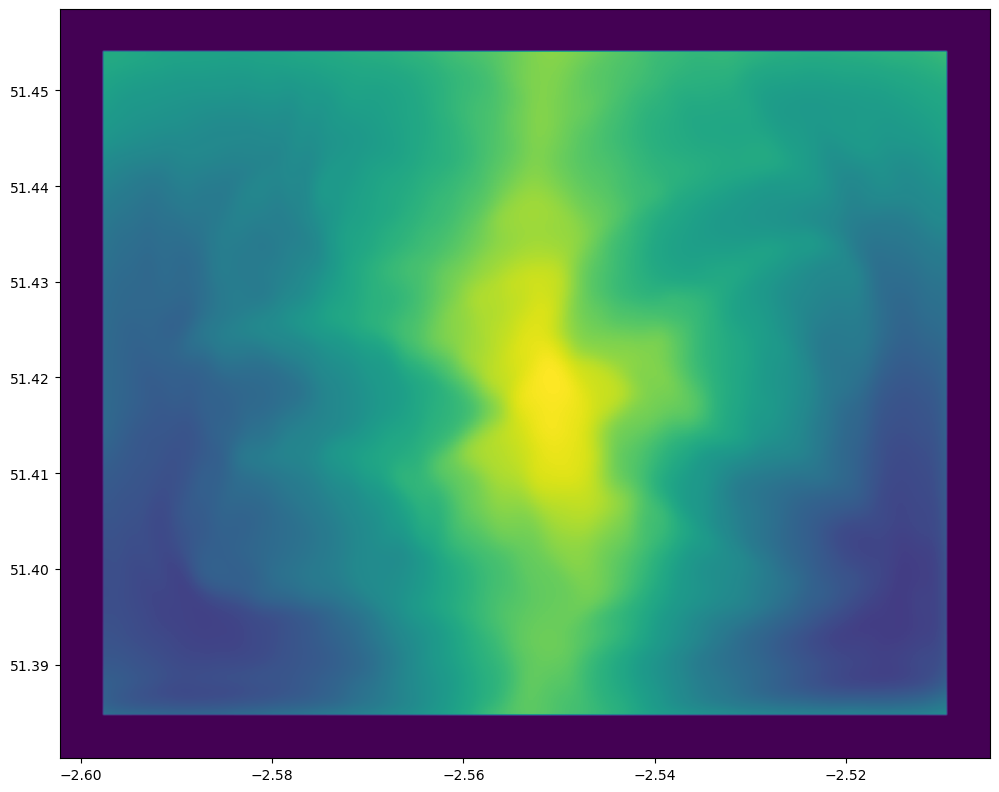

In [9]:
%matplotlib inline

# read and visualize the saved geotiff
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
src = rasterio.open(output_file)
fig, ax = plt.subplots(1, figsize=(12, 12))
show(src, ax=ax)

with rasterio.open(output_file) as src:

    dem_data =  src.read(1)
 # Find the indices of the maximum elevation
    max_index = np.unravel_index(np.argmax(dem_data, axis=None), dem_data.shape)

    # Get the coordinates of the maximum elevation
    max_elevation = dem_data[max_index]
    max_coords = src.transform * (max_index[1], max_index[0])

    print(f"Maximum Elevation: {max_elevation} meters")
    print(f"Coordinates: {max_coords}")
# find xy at maximum. 